In [24]:
import cv2
import numpy as np
import glob
import pytesseract as OCR
import matplotlib.pyplot as plt

def onMouse(event,x,y,flags,params):
    global ix,iy,fx,fy
    buttonLoc()
    if event == cv2.EVENT_LBUTTONDBLCLK:
        if (x in but1_x) & (y in but1_y):
            print("Name func")
        elif (x in but2_x) & (y in but2_y):
            print("Age func")
        elif (x in but3_x) & (y in but3_y):
            print("Disease func")
        elif (x in but4_x) & (y in but4_y):
            print("symptom1 func")
        elif (x in but5_x) & (y in but5_y):
            print("symptom2 func")
        elif (x in but6_x) & (y in but6_y):
            print("symptom3 func")
        elif (x in but7_x) & (y in but7_y):
            img_path = input('Image path : ')
            global user_input_img
            user_input_img = cv2.imread('./Sample_chart_img.jpg')
            user_input_img = cv2.resize(user_input_img,(570,480))
            user_input_img = cv2.cvtColor(user_input_img,cv2.COLOR_RGB2GRAY)
            backgrnd[120:600,270:840] = user_input_img
            
        elif (x in but8_x) & (y in but8_y):
            print("Otsu func")
            global otsu_img
            ret, otsu_img = cv2.threshold(user_input_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
            backgrnd[120:600,270:840] = otsu_img
            
        elif (x in but9_x) & (y in but9_y):
            print("Threshlod")
            global user_th_img
            user_threshold = int(input('Threshold : '))
            ret, user_th_img = cv2.threshold(user_input_img, user_threshold, 255, cv2.THRESH_BINARY) #cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
            backgrnd[120:600,270:840] = user_th_img
            
        elif (x in but10_x) & (y in but10_y):
            print("Run func")
#         elif (x in but11_x) & (y in but11_y):
#             print("?")
        else :
            print("out of box")
            
    if event == cv2.EVENT_RBUTTONDOWN:
        ix,iy = x,y
        print("start point : ",ix,iy)       

    elif event == cv2.EVENT_RBUTTONUP:
        fx,fy= x,y
        print("end point : ",fx,fy)
        cv2.rectangle(backgrnd,(ix,iy),(fx,fy),(100),2)

    return

def buttonLoc():
    global but1_x,but1_y,but2_x,but2_y,but3_x,but3_y,but4_x,but4_y,but5_x,but5_y,but6_x,but6_y,but7_x,but7_y,but8_x,but8_y,but9_x,but9_y,but10_x,but10_y
           
    # Name button
    but1_x = range(50,150) 
    but1_y = range(150,180)
    # Age button
    but2_x = range(50,150)
    but2_y = range(200,230)
    # Disease button
    but3_x = range(50,150)
    but3_y = range(250,280)    
      # symptom1 button
    but4_x = range(50,150)
    but4_y = range(300,330)  
      # symptom2 button
    but5_x = range(50,150)
    but5_y = range(350,380)  
      # symptom3 button
    but6_x = range(50,150)
    but6_y = range(400,430)  
      # image path
    but7_x = range(400,500)
    but7_y = range(10,40)  
       # threshold
    but8_x = range(350,450)
    but8_y = range(60,90)  
       # filtering
    but9_x = range(550,650)
    but9_y = range(60,90)  
       # run
    but10_x = range(780,880)
    but10_y = range(650,680)
#        # ?
#     but11_x = range(630,730)
#     but11_y = range(650,680)
    return
   
def putText(input_img):
    scale = 0.8
    font = 2
    cv2.putText(input_img,"Name",(but1_x[10],but1_y[-1]),font,scale,(0,0,0))
    cv2.putText(input_img,"Age",(but2_x[10],but2_y[-1]),font,scale,(0,0,0))
    cv2.putText(input_img,"Disease",(but3_x[5],but3_y[-1]),font,scale,(0,0,0))
    cv2.putText(input_img,"symptom1",(but4_x[5],but4_y[-1]),font,scale,(0,0,0))
    cv2.putText(input_img,"symptom2",(but5_x[5],but5_y[-1]),font,scale,(0,0,0))
    cv2.putText(input_img,"symptom3",(but6_x[5],but6_y[-1]),font,scale,(0,0,0))
    cv2.putText(input_img,"Image path",(but7_x[5],but7_y[-1]),font,scale,(0,0,0))
    cv2.putText(input_img,"Otsu",(but8_x[5],but8_y[-1]),font,scale,(0,0,0))
    cv2.putText(input_img,"Threshold",(but9_x[5],but9_y[-1]),font,scale,(0,0,0))
    cv2.putText(input_img,"Run",(but10_x[25],but10_y[-1]),font,scale,(0,0,0))
#     cv2.putText(input_img,"?",(but11_x[25],but11_y[-1]),font,scale,(0,0,0))
    return input_img

def rec_draw():
    cv2.rectangle(backgrnd,(50,150),(150,180),(100),-1) #name
    cv2.rectangle(backgrnd,(50,200),(150,230),(100),-1) #Age
    cv2.rectangle(backgrnd,(50,250),(150,280),(100),-1) #Disease
    cv2.rectangle(backgrnd,(50,300),(190,330),(100),-1) #symptom1
    cv2.rectangle(backgrnd,(50,350),(190,380),(100),-1) #symptom2
    cv2.rectangle(backgrnd,(50,400),(190,430),(100),-1) #symptom3
    cv2.rectangle(backgrnd,(400,10),(560,40),(100),-1) #image path
    cv2.rectangle(backgrnd,(350,60),(450,90),(100),-1) #Otsu
    cv2.rectangle(backgrnd,(550,60),(670,90),(100),-1) #filtering
    cv2.rectangle(backgrnd,(780,650),(880,680),(100),-1) #Run
    cv2.rectangle(backgrnd,(270,120),(840,600),(100),-1) #image place
    # cv2.rectangle(backgrnd,(580,120),(840,450),(150,150,150),-1) #list place
    return


In [26]:
global backgrnd

buttonLoc()
rec_draw()
backgrnd = putText(backgrnd)

#이미지 띄우기
# backgrnd[120:600,270:840] = user_input_img
#텍스트 그리기


cv2.namedWindow('Chart Detection') 
cv2.setMouseCallback('Chart Detection',onMouse) 
cv2.imshow("Chart Detection", backgrnd)

while(1): 
    cv2.imshow('Chart Detection',backgrnd) 
    if cv2.waitKey(20) & 0xFF == 32: # enter Space Bar
#        crop_area = backgrnd[iy:fy,ix:fx,:]
#        OCR2str_data = OCR.image_to_string(crop_area,lang='eng')
#        print(OCR2str_data)
#        plt.imshow(crop_area)
        break
    if cv2.waitKey(20) & 0xFF == 27: # enter ESC 
        break
#    if cv2.waitKey(20) & 0xFF == 65: # enter ESC 
#        cv2.imshow("AAA",user_th_img)
#        cv2.waitKey()        

cv2.destroyAllWindows()

Image path :  123


Otsu func
Threshlod


Threshold :  130


Threshlod


Threshold :  120


Threshlod


Threshold :  140


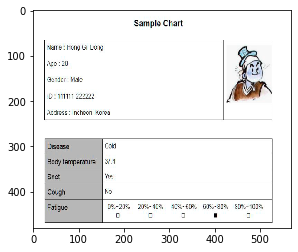

In [33]:

plt.imshow(a)

In [20]:
chart_img = cv2.imread('./Sample_chart_img.jpg')

mask = np.zeros(img.shape[:2],np.uint8)
mask[100:600,30:730] = 255

masked_img = cv2.bitwise_and(img,img,mask=mask)

img = img[:,:,::-1]
img2 = masked_img[:,:,::-1]

print("masked_img : ", img2.shape[:2])
cv2.imshow("test",img)
cv2.waitKey()
cv2.destroyAllWindows()

masked_img :  (530, 750)


In [ ]:
mask[100:600,30:730] = 255

masked_img = cv2.bitwise_and(img,img,mask=mask)

In [20]:
#img threshold
img = cv2.imread('sample.png',cv2.IMREAD_GRAYSCALE)

ret, img_result1 = cv2.threshold(img, 125, 255, cv2.THRESH_BINARY) #cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
ret, img_result2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#excel

df2 = pd.DataFrame({'name' : list(dic.keys()),
                     'Age' : list(dic.values())})


writer = pd.ExcelWriter('chart!!!.xlsx', engine='xlsxwriter')
df2.to_excel(writer, sheet_name='chart')
writer.save()
writer.close()

NameError: name 'pd' is not defined

In [21]:
ret

0.0